In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

**TRANSACTION DATA**

In [ ]:
transaction_data = pd.read_excel("/content/QVI_transaction_data.xlsx")

In [ ]:
transaction_data.describe(include = 'all')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836,264836.000000,264836.000000
unique,NaN,NaN,NaN,NaN,NaN,114,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3304,NaN,NaN
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,NaN,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,NaN,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,NaN,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,NaN,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,NaN,2.000000,9.200000


Note : The numeric data are of the correct dtype

if that were not the case transaction_data = transactional_data.astype({"PROD_NBR" : int})

In [ ]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
# Converting date from integer to date format

transaction_data["DATE"] = transaction_data.apply(lambda x :datetime.fromordinal(datetime(1900, 1, 1).toordinal() + x.DATE - 2),axis = 1)

#-2 because the "start date" for Excel dates is actually the last day of 1899, and Excel assumes that 1900 was a leap year (it's not).
#Therefore i day for 31/12/1899 and 1 for the miss calculated leap year 
# 1/1/1900 == 1 in excel, decimal value refer to time

In [ ]:
transaction_data.describe(include = 'all')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836,264836.000000,264836.000000
unique,364,NaN,NaN,NaN,NaN,114,NaN,NaN
top,2018-12-24 00:00:00,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN
freq,939,NaN,NaN,NaN,NaN,3304,NaN,NaN
first,2018-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,135.08011,1.355495e+05,1.351583e+05,56.583157,NaN,1.907309,7.304200
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,NaN,0.643654,3.083226
min,NaN,1.00000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.500000
25%,NaN,70.00000,7.002100e+04,6.760150e+04,28.000000,NaN,2.000000,5.400000


In [ ]:
transaction_data["PROD_NAME"].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [ ]:
product_words = pd.DataFrame(transaction_data["PROD_NAME"].unique())

In [ ]:
product_words

,0
0,Natural Chip Compny SeaSalt175g
1,CCs Nacho Cheese 175g
2,Smiths Crinkle Cut Chips Chicken 170g
3,Smiths Chip Thinly S/Cream&Onion 175g
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g
...,...
109,Red Rock Deli Chikn&Garlic Aioli 150g
110,RRD SR Slow Rst Pork Belly 150g
111,RRD Pc Sea Salt 165g
112,Smith Crinkle Cut Bolognese 150g


In [ ]:
words = product_words

In [ ]:
import re
words = words.apply(lambda  x: " ".join(re.findall("[a-zA-Z]+", str(x))),axis =1)

In [ ]:
words

0        Natural Chip Compny SeaSalt g Name dtype object
1                   CCs Nacho Cheese g Name dtype object
2      Smiths Crinkle Cut Chips Chicken g Name dtype ...
3      Smiths Chip Thinly S Cream Onion g Name dtype ...
4      Kettle Tortilla ChpsHny Jlpno Chili g Name dty...
                             ...                        
109    Red Rock Deli Chikn Garlic Aioli g Name dtype ...
110       RRD SR Slow Rst Pork Belly g Name dtype object
111                  RRD Pc Sea Salt g Name dtype object
112      Smith Crinkle Cut Bolognese g Name dtype object
113               Doritos Salsa Mild g Name dtype object
Length: 114, dtype: object

In [ ]:
words.describe()

count                                                 114
unique                                                114
top       Smith Crinkle Cut Bolognese g Name dtype object
freq                                                    1
dtype: object

In [ ]:
transaction_data["PROD_NAME"] = transaction_data.apply(lambda x:"salsa" if re.findall('Salsa' , x.PROD_NAME ) else x.PROD_NAME ,axis= 1)

In [ ]:
transaction_data= transaction_data[transaction_data.PROD_NAME != 'salsa']


In [ ]:
transaction_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [ ]:
#1. Clearly we have an outliers , in TOT_SALES mean ~7.32 but Max is 650 !
#2. PROD_QTY mean ~2 max is at 200
# We also don't have Null values seen from count but this the general method to check for null values in columns
transaction_data.isnull().sum()


DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

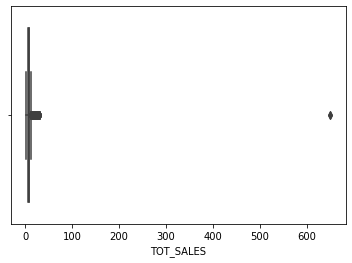

In [ ]:
sns.boxplot(transaction_data.TOT_SALES)

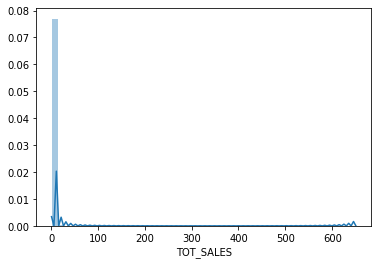

In [ ]:
sns.distplot(transaction_data.TOT_SALES)

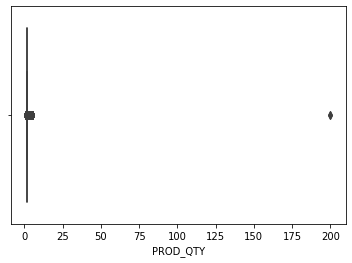

In [ ]:
sns.boxplot(transaction_data.PROD_QTY)

In [ ]:
#we can see the outlier after 600 at TOt_sales and an outlier at 200 for PROD_QTY

In [ ]:
numeric_data = transaction_data.select_dtypes(['float','int'])
numeric_data.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,1,1000,1,5,2,6.0
1,1,1307,348,66,3,6.3
2,1,1343,383,61,2,2.9
3,2,2373,974,69,5,15.0
4,2,2426,1038,108,3,13.8


In [ ]:
x = numeric_data[numeric_data["TOT_SALES"] < 8.000]

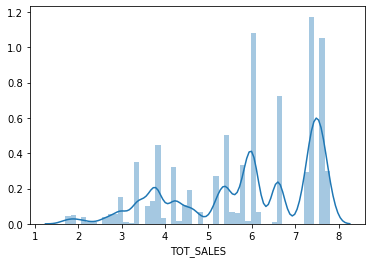

In [ ]:
sns.distplot(x["TOT_SALES"])

In [ ]:
Outliers = transaction_data[transaction_data.PROD_QTY >= 200]

In [ ]:
Outliers

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [ ]:
Other_Purchases_by_outlier = transaction_data[transaction_data.LYLTY_CARD_NBR == 226000]

In [ ]:
Other_Purchases_by_outlier

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [ ]:
#the outlier has not made any other purchases

transaction_data = transaction_data[transaction_data['LYLTY_CARD_NBR'] != 226000]

In [ ]:
transaction_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [ ]:
Grouped_Transaction_data = transaction_data.groupby('DATE')
Count = list(Grouped_Transaction_data["TOT_SALES"].count())

In [ ]:
Grouped_dates = pd.DataFrame({"DATE":transaction_data["DATE"].unique(), "COUNT" : Count}) 
Grouped_dates

,DATE,COUNT
0,2018-10-17,663
1,2019-05-14,650
2,2019-05-20,674
3,2018-08-17,669
4,2018-08-18,660
...,...,...
359,2018-12-08,657
360,2019-01-30,669
361,2019-02-09,673
362,2018-08-31,703


In [ ]:
#Only 364 rows . therefore we miss a date
days = [datetime.fromordinal( datetime(2018, 7, 1).toordinal() + x ) for x in range(365)]
day_sequence = pd.DataFrame(days, columns = ["DATE"])

In [ ]:
day_sequence
#transaction_by_date = pd.DataFrame({"DATE":transactions_days["DATE"],"TOT_SALES":transactions_days["TOT_SALES"]})
#transaction_by_date


,DATE
0,2018-07-01
1,2018-07-02
2,2018-07-03
3,2018-07-04
4,2018-07-05
...,...
360,2019-06-26
361,2019-06-27
362,2019-06-28
363,2019-06-29


In [ ]:
#missing_date = day_sequence.set_index('DATE').join(Grouped_dates.set_index('DATE'))
missing_date = day_sequence.join(Grouped_dates.set_index('DATE'), on='DATE')

In [ ]:
missing_date

,DATE,COUNT
0,2018-07-01,698.0
1,2018-07-02,865.0
2,2018-07-03,670.0
3,2018-07-04,668.0
4,2018-07-05,676.0
...,...,...
360,2019-06-26,669.0
361,2019-06-27,646.0
362,2019-06-28,716.0
363,2019-06-29,672.0


In [ ]:
is_NaN = missing_date.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = missing_date[row_has_NaN]

rows_with_NaN

,DATE,COUNT
177,2018-12-25,NaN


In [ ]:
transaction_data["PACK_SIZE"] = transaction_data.apply(lambda rw:int(re.findall('[0-9]+',rw.PROD_NAME)[0]), axis= 1)
transaction_data["BRAND_NAME"] = transaction_data.apply(lambda rw:re.findall('[a-zA-Z]+',rw.PROD_NAME)[0], axis= 1)

In [ ]:
transaction_data.describe(include= 'all')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740,246740.000000,246740.000000,246740.000000,246740
unique,364,NaN,NaN,NaN,NaN,105,NaN,NaN,NaN,28
top,2018-12-24 00:00:00,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN,NaN,Kettle
freq,865,NaN,NaN,NaN,NaN,3304,NaN,NaN,NaN,41288
first,2018-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,135.050361,1.355303e+05,1.351304e+05,56.352213,NaN,1.906456,7.316113,175.583521,NaN
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,NaN,0.342499,2.474897,59.432118,NaN
min,NaN,1.000000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.700000,70.000000,NaN
25%,NaN,70.000000,7.001500e+04,6.756875e+04,26.000000,NaN,2.000000,5.800000,150.000000,NaN


In [ ]:
# Max Pack size = 380 and Min Pack size = 70


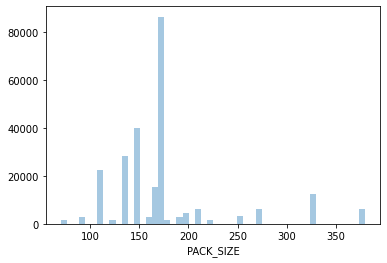

In [ ]:
sns.distplot(transaction_data["PACK_SIZE"],kde = False)


In [ ]:
transaction_data["BRAND_NAME"].describe()

count     246740
unique        28
top       Kettle
freq       41288
Name: BRAND_NAME, dtype: object

In [ ]:
transaction_data["BRAND_NAME"].head()

0    Natural
1        CCs
2     Smiths
3     Smiths
4     Kettle
Name: BRAND_NAME, dtype: object

In [ ]:
transaction_data["BRAND_NAME"].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [ ]:
transaction_data["BRAND_NAME"] = transaction_data["BRAND_NAME"].replace("RRD","Red")
transaction_data["BRAND_NAME"] = transaction_data["BRAND_NAME"].replace("Smith","Smiths")
transaction_data["BRAND_NAME"] = transaction_data["BRAND_NAME"].replace("Snbts","Sunbites")
transaction_data["BRAND_NAME"] = transaction_data["BRAND_NAME"].replace("Dorito","Doritos")
transaction_data["BRAND_NAME"] = transaction_data["BRAND_NAME"].replace("WW","WoolWorths") 
transaction_data["BRAND_NAME"] = transaction_data["BRAND_NAME"].replace("Infzns","Infuzions") 

In [ ]:
transaction_data["BRAND_NAME"].value_counts()

Kettle        41288
Smiths        30353
Doritos       25224
Pringles      25102
Red           16321
Infuzions     14201
Thins         14075
WoolWorths    11836
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Sunbites       3008
Cheetos        2927
Burger         1564
GrnWves        1468
NCC            1419
French         1418
Name: BRAND_NAME, dtype: int64

**CUSTOMER DATA**

In [ ]:
purchase_behaviour = pd.read_csv("QVI_purchase_behaviour.csv")

In [ ]:
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
purchase_behaviour.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
Encoded_Lifestage = LE.fit_transform(purchase_behaviour["LIFESTAGE"])

In [ ]:
LABEL_INDEX = pd.DataFrame({"Lifestages": purchase_behaviour["LIFESTAGE"].unique(), "Encodings":[i for i in range(int(purchase_behaviour["LIFESTAGE"].nunique()))]})
LABEL_INDEX.set_index("Encodings")


,Lifestages
Encodings,
0,YOUNG SINGLES/COUPLES
1,YOUNG FAMILIES
2,OLDER SINGLES/COUPLES
3,MIDAGE SINGLES/COUPLES
4,NEW FAMILIES
5,OLDER FAMILIES
6,RETIREES


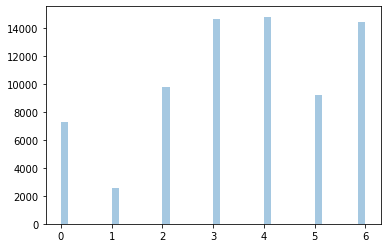

In [ ]:
sns.distplot(Encoded_Lifestage, kde = False)

In [ ]:
data = pd.merge(transaction_data,purchase_behaviour)

In [ ]:
data.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND_NAME          0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [ ]:
# No Null values found!